In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('startup_funding.csv')

In [3]:
df.sample(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
1902,1903,31/03/2016,SwitchMe,Consumer Internet,Home Loan Rate comparison platform,Mumbai,"Mohandas Pai, Hiro Mashita, Singapore Angel Ne...",Seed Funding,NaN,NaN
454,455,14/12/2017,Curofy,Technology,Mobile App for Network of Doctors,Gurgaon,RoundGlass Partners LLC,Seed/Angel Funding,"2,50,000",NaN
1414,1415,01/08/2016,RepairEasy,Consumer Internet,Gadget Repair Services Platform,Pune,Undisclosed HNIs,Seed Funding,"2,75,000",NaN
857,858,03/04/2017,Tyre Express,Technology,Enterprise IoT solutions For Tyre Performance,Mumbai,Rohitash Gupta,Seed Funding,NaN,NaN
501,502,17/11/2017,Perspectico,Technology,Placement preparation and career growth traini...,Delhi,"SSCBS Innovation, Incubation Foundation (SIIF)",Seed/Angel Funding,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [5]:
df.isnull().sum() * 100.0 / df.shape[0]

Sr No                 0.000000
Date dd/mm/yyyy       0.000000
Startup Name          0.000000
Industry Vertical     5.617608
SubVertical          30.749014
City  Location        5.913272
Investors Name        0.788436
InvestmentnType       0.131406
Amount in USD        31.537451
Remarks              86.235217
dtype: float64

### There are 86 % missing value present in Remarks columns. So we drop that column

In [6]:
df.drop(columns=['Remarks'],inplace=True)

In [7]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [8]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD'],
      dtype='object')

In [9]:
df.set_index('Sr No',inplace=True)

In [10]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


### Renaming the columns

In [11]:
df.rename(
    columns={
        'Date dd/mm/yyyy':'date',
        'Startup Name':'startup',
        'Industry Vertical':'vertical',
        'SubVertical':'subvertical',
        'City  Location':'city',
        'Investors Name':'inverstor',
        'InvestmentnType':'round',
        'Amount in USD':'amount_in_usd'
    },
    inplace=True

)

In [12]:
df.head()

,date,startup,vertical,subvertical,city,inverstor,round,amount_in_usd
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [13]:
df['amount_in_usd'].value_counts()

10,00,000    165
5,00,000     108
20,00,000     69
50,00,000     66
30,00,000     66
            ... 
82,50,000      1
8,72,000       1
5,70,000       1
5,37,000       1
32,50,000      1
Name: amount_in_usd, Length: 471, dtype: int64

In [14]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [15]:
df['amount_in_usd'].value_counts()

10,00,000               165
5,00,000                108
20,00,000                69
50,00,000                66
30,00,000                66
1,00,00,000              60
1,00,000                 57
1,50,000                 45
2,00,000                 44
2,50,000                 41
60,00,000                40
1,50,00,000              39
15,00,000                37
40,00,000                35
3,00,000                 31
25,00,000                25
5,00,00,000              24
6,00,000                 23
4,00,000                 21
2,00,00,000              21
12,00,000                20
3,00,00,000              19
2,50,00,000              18
10,00,00,000             17
4,50,000                 17
70,00,000                16
1,20,00,000              15
3,50,000                 14
7,50,000                 13
1,60,00,000              12
80,00,000                12
45,00,000                12
11,00,000                11
1,10,00,000              11
35,00,000                11
50,000              

In [16]:
df['amount_in_usd'] = df['amount_in_usd'].fillna('0')

In [17]:
df['amount_in_usd'] = df['amount_in_usd'].str.replace(',','')
df['amount_in_usd'] = df['amount_in_usd'].str.replace('undisclosed','0')
df['amount_in_usd'] = df['amount_in_usd'].str.replace('unknown','0')
df['amount_in_usd'] = df['amount_in_usd'].str.replace('Undisclosed','0')

In [18]:
df = df[df['amount_in_usd'].str.isdigit()]

In [19]:
df['amount_in_usd'] = df['amount_in_usd'].astype('float')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3029 non-null   object 
 1   startup        3029 non-null   object 
 2   vertical       2858 non-null   object 
 3   subvertical    2104 non-null   object 
 4   city           2849 non-null   object 
 5   inverstor      3005 non-null   object 
 6   round          3027 non-null   object 
 7   amount_in_usd  3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


### converting dollar value to INR Currency (Crore)

In [21]:
def to_inr(dollar):
    inr = dollar * 84.68
    return inr / 10000000

In [22]:
df['amount_in_usd'] = df['amount_in_usd'].apply(to_inr)

In [23]:
df.rename(columns = {'amount_in_usd':'amount_in_inr'},inplace=True)

In [50]:
df.sample(5)

,date,startup,vertical,subvertical,city,inverstor,round,amount_in_inr
Sr No,,,,,,,,
800,2017-08-05,YepMe,eCommerce,Private Label Fashion etailer,Gurgaon,"Rainbow Digital Services Pvt. Ltd, ILearnFinan...",Private Equity,5.92760
2955,2015-09-02,Faaso\\xe2\\x80\\x99s,NaN,NaN,NaN,Lightbox Ventures,Private Equity,169.36000
754,2017-06-16,Fincash,Consumer Internet,Personal Finance platform,Mumbai,"Mohammed Khan, Sameer Narayan & Others",Seed Funding,0.84680
1908,2016-02-02,Strike,Consumer Internet,Mobile Email productivity tool,Bangalore,Multiple investors through Ten Minute Million ...,Seed Funding,0.19053
395,2018-08-01,DAAKI,E-commerce,Sports Nutrition Supplement etailer,Bengaluru,Rohan Agila,Angel / Seed Funding,0.00000


In [25]:
round(df['amount_in_inr'].sum())

322080

In [52]:
df['round'].unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
       'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
       'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
       'Seed Funding', nan, 'Funding Round', 'Corporate Round',
       'Maiden Round', 'pre-series A', 'Seed Funding Round',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Pre Series A', 'Equity', 'Debt-Funding',
       'Mezzanine', 'Series B (Extension)', 'Equity Based Funding',
       'Private Funding', 'Seed / Angel Funding', 'Seed/Angel Funding',
       'Seed funding', 'Seed / Angle Funding', 'Angel / Seed Funding',
       'Private', 'Structured Debt', 'Term Loan', 'PrivateEquity',
       'Angel Funding', 'Seed\\\\nFunding', 'Private\\\\nEquity',
       'Cr

In [53]:
df[df['startup'].str.contains('YepMe')].groupby('vertical')['amount_in_inr'].sum().sort_values(ascending=False)

vertical
Private label Fashion eTailer    635.1000
eCommerce                          5.9276
Name: amount_in_inr, dtype: float64

In [51]:
df[df['startup'].str.contains('YepMe')].groupby('city')['startup'].count().sort_values(ascending=False)

city
Gurgaon      2
New Delhi    1
Name: startup, dtype: int64

In [26]:
df.groupby('startup')['amount_in_inr'].max().sort_values(ascending=False).head(1).values[0]

33025.2

<AxesSubplot:xlabel='startup'>

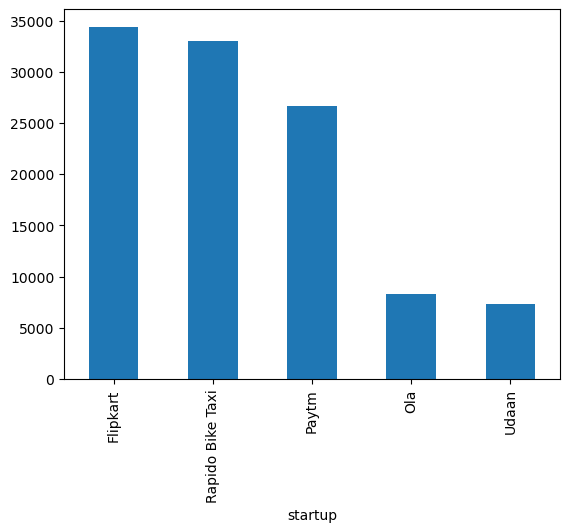

In [29]:
df.groupby('startup')['amount_in_inr'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

In [36]:
df['date'] = df['date'].str.replace('05/072018', '05/07/2018')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

C:\Users\Lenovo\AppData\Local\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Lenovo\AppData\Local\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Lenovo\AppData\Local\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Lenovo\AppData\Local\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16

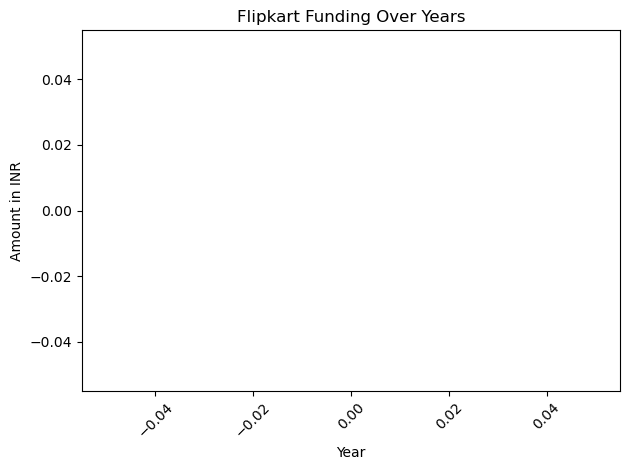

In [40]:
import matplotlib.pyplot as plt

df[df['startup'].str.contains('paytm')].groupby(df['date'].dt.year)['amount_in_inr'].sum().plot()

plt.xlabel('Year')
plt.ylabel('Amount in INR')
plt.title('Flipkart Funding Over Years')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()       # Adjust layout to prevent clipping
plt.show()


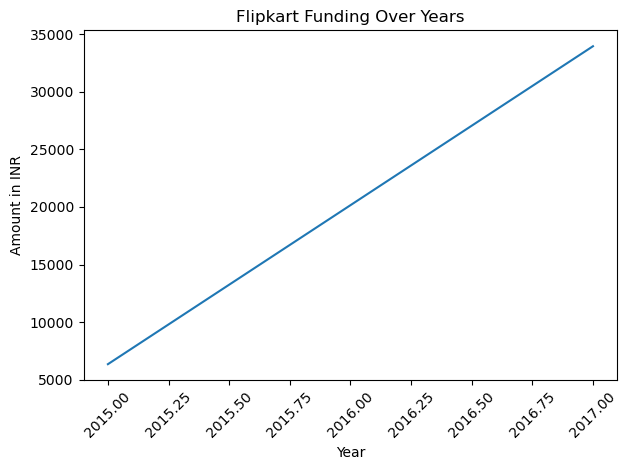

In [41]:
import matplotlib.pyplot as plt

# Filter and prepare the data
flipkart_df = df[df['startup'].str.contains('Flipkart', na=False)].copy()
flipkart_df = flipkart_df[flipkart_df['date'].notna()]  # Drop rows with missing dates

# Group by integer year
flipkart_df['year'] = flipkart_df['date'].dt.year.astype(int)
flipkart_df.groupby('year')['amount_in_inr'].sum().plot()

plt.xlabel('Year')
plt.ylabel('Amount in INR')
plt.title('Flipkart Funding Over Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
df['date'].dt.year.unique()

array([2020., 2019., 2018., 2017., 2016., 2015.,   nan])